In [1]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import Subset
from torch.utils.data import DataLoader
from evolution import Population
import matplotlib.pyplot as plt
import time

200
-2.269587278366089
-2.2432174682617188 0.1941    best
-2.2432174682617188 0.1941    
-2.2432174682617188 0.1941    
-2.240422248840332 0.2053    best
-2.232201099395752 0.2094    best
-2.229487657546997 0.2044    best
-2.2244949340820312 0.2219    best
-2.216212272644043 0.1887    best
-2.216212272644043 0.1887    
-2.2071495056152344 0.2089    best
-2.2071495056152344 0.2089    
-2.201521635055542 0.2096    best
-2.1959569454193115 0.2175    best
-2.1910414695739746 0.2279    best
-2.1910414695739746 0.2279    
-2.188800573348999 0.2168    best
-2.187535524368286 0.2215    best
-2.1833817958831787 0.2194    best
-2.1740036010742188 0.2293    best
-2.1740036010742188 0.2293    
-2.1740036010742188 0.2293    
-2.1599080562591553 0.2111    best
-2.1599080562591553 0.2111    
-2.1599080562591553 0.2111    
-2.1525168418884277 0.2143    best
-2.1525168418884277 0.2143    
-2.142618417739868 0.2146    best
-2.142618417739868 0.2146    
-2.1356959342956543 0.242    best
-2.13569593429565

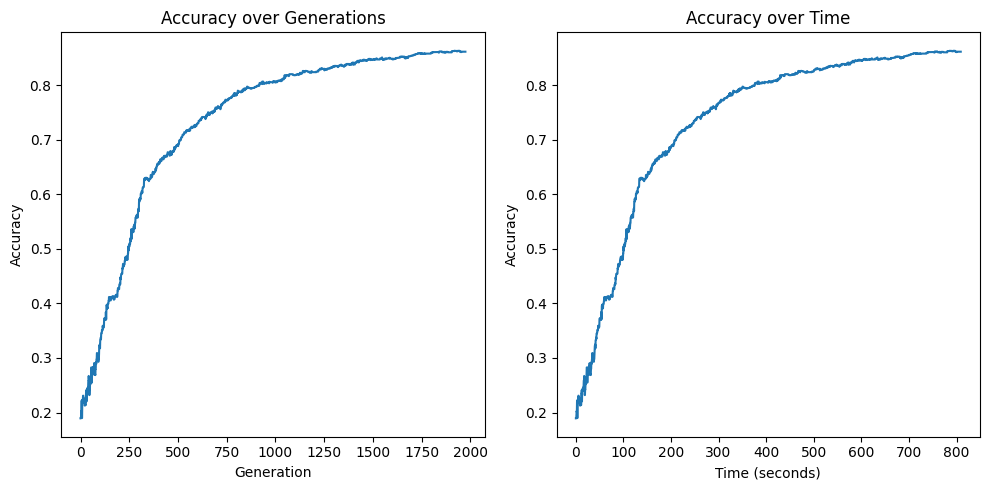

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

subset_indices = torch.randperm(len(train_dataset))[:10000]
train_subset = Subset(train_dataset, subset_indices)

train_size = len(train_subset)
test_size = len(test_dataset)
train_loader = DataLoader(dataset=train_subset, batch_size=train_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_size, shuffle=False)

test_iter = iter(test_loader)
test_data = next(test_iter)

pop = Population(pop_size=200, input_size=28*28, hidden_size=10, output_size=10, dataloader=train_loader)

accuracies = []
times = []

print(len(pop.individuals))
print(pop.get_best_individual().fitness)

best = -10000
last_improve_count = 0

start_time = time.time()
while last_improve_count < 20:
    pop.advance_generation()
    
    gen_best = pop.get_best_individual().fitness
    print(gen_best, pop.get_best_individual().accuracy, end="    ")
    
    accuracies.append(pop.get_best_individual().calculate_fitness(test_data[0], test_data[1])[1])
    times.append(time.time() - start_time)
    
    if gen_best > best:
        best = gen_best
        print("best")
        last_improve_count = 0
    else:
        print("")
        last_improve_count += 1
        
end_time = time.time()

print("Total time:", end_time - start_time)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.title('Accuracy over Generations')

plt.subplot(1,2,2)
plt.plot(times, accuracies)
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')

plt.tight_layout()
plt.show()

In [3]:
best_model = pop.get_best_individual()

loss, acc = best_model.calculate_fitness(test_data[0], test_data[1])

print(acc)
print(len(accuracies))
print(times[-1])


0.8614
1975
808.765843629837


In [4]:
from neural_net import MLP
'''

backprop_nn = MLP(input_size=28*28, hidden_size=10, output_size=10)

epochs = 1000
for _ in range(epochs):
    backprop_nn.train_backprop(train_loader)
backprop_nn.calculate_fitness(test_data[0], test_data[1])
'''

'\n\nbackprop_nn = MLP(input_size=28*28, hidden_size=10, output_size=10)\n\nepochs = 1000\nfor _ in range(epochs):\n    backprop_nn.train_backprop(train_loader)\nbackprop_nn.calculate_fitness(test_data[0], test_data[1])\n'

loss: 2.351506  [    0/10000]
Accuracy: 0.1305 Time: 1.0772416591644287
loss: 2.276825  [    0/10000]
Accuracy: 0.1793 Time: 1.9574391841888428
loss: 2.225694  [    0/10000]
Accuracy: 0.2342 Time: 2.8776466846466064
loss: 2.174590  [    0/10000]
Accuracy: 0.2811 Time: 3.7178354263305664
loss: 2.121468  [    0/10000]
Accuracy: 0.3246 Time: 4.55002236366272
loss: 2.067164  [    0/10000]
Accuracy: 0.3669 Time: 5.427219867706299
loss: 2.011944  [    0/10000]
Accuracy: 0.4018 Time: 6.250409364700317
loss: 1.955590  [    0/10000]
Accuracy: 0.4371 Time: 7.134607553482056
loss: 1.898307  [    0/10000]
Accuracy: 0.4729 Time: 7.942789316177368
loss: 1.841315  [    0/10000]
Accuracy: 0.5063 Time: 8.767976999282837
loss: 1.786963  [    0/10000]
Accuracy: 0.5375 Time: 9.641172885894775
loss: 1.735489  [    0/10000]
Accuracy: 0.5608 Time: 10.453355550765991
loss: 1.686577  [    0/10000]
Accuracy: 0.5845 Time: 11.325551509857178
loss: 1.639817  [    0/10000]
Accuracy: 0.6042 Time: 12.134734392166138


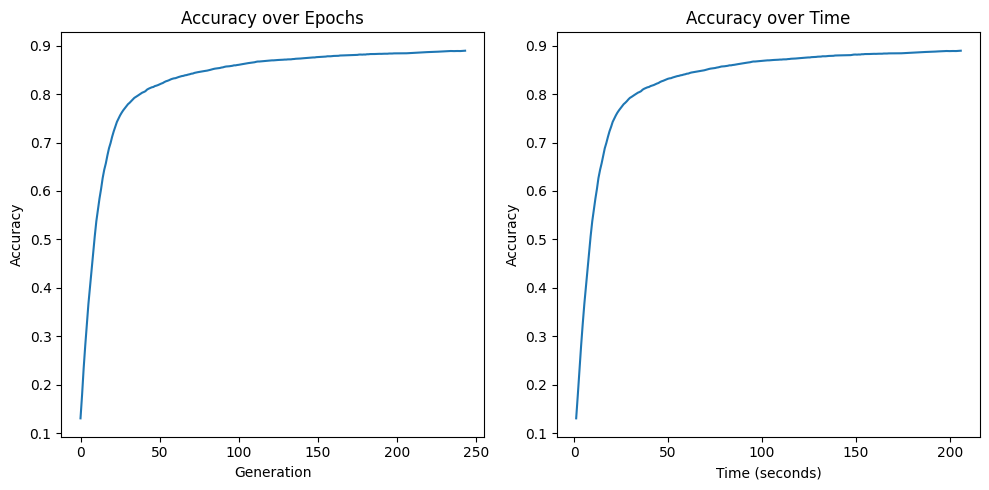

In [5]:
import time
import matplotlib.pyplot as plt

backprop_nn = MLP(input_size=28*28, hidden_size=10, output_size=10)

# Train until loss diference is minimal with unlimited epochs
loss_diff = 100
last_loss = 100
accuracies = []
times = []
start_time = time.time()

while loss_diff > 0.0005:
    loss = backprop_nn.train_backprop(train_loader)
    loss_diff = last_loss - loss
    last_loss = loss
    _, acc = backprop_nn.calculate_fitness(test_data[0], test_data[1])
    accuracies.append(acc)
    times.append(time.time() - start_time)
    end_time = time.time()
    print("Accuracy:", acc, "Time:", end_time - start_time)

#plot the accuracies
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(times, accuracies)
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')

plt.tight_layout()
plt.show()

In [6]:
_, acc = backprop_nn.calculate_fitness(test_data[0], test_data[1])
print(acc)
print(len(accuracies))
print(times[-1])

0.8896
244
205.9269802570343
